# Project: Analysis of No-Show Medical Appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#limitation">Limitations</a></li>
<li><a href="#reference">References</a></li>
</ul>

<a id='intro'></a>
## Introduction

The data set to be investigated contains records of 110,527 medical appointments and it is associated to 14 variables (characteristics). The most important variable is the "No-show" column which indicates whether the patient show-up or no-show to the appointment. Below are list of Variables.

|VARIABLE | DESCRIPTION|
|---------|------------|
|PatientId | This is a unique identifier of each patient |
|AppointmentID | An ID unique to each scheduuled appointment |
|Gender | Show the gender(sex) of the patient |
|ScheduledDay | Date which the patients planned their medical visit |
|AppointmentDay | Date which patients are given for medical visit |
|Age | Age of the patient |
|Neighbourhood | Place the patient lives |
|Scholarship | Indicates if the patient is enrolled in welfare program of not |
|Hipertension | Indicates if a patients is Hypertensive or not |
|Diabetes | Indicates if a patients is Diabetic or not |
|Alcoholism | Indicates if a patient is an alcoholic or not |
|Handcap | Indicates if the patient is Handicaped |
|SMS_received | Indicates if the patient received an SMS for his/her appointment |
|No-show | Indicates if the patient show up for their appointment or not |

It will be very useful for your readers if you expand the introduction to discuss the analysis that you intend to implement.

The following questions will be Answered in this report
<ul>
<li><a href="#a">What Percentage of patients did not show up for their Appointment?</a></li>
<li><a href="#b">Did Patients enrolled in the scholarship program show up for appointment more than others?</a></li>
<li><a href="#c">Did younger patients show up for their appointment more than older patients?</a></li>
<li><a href="#d">Which Gender has more Patients?</a></li>
<li><a href="#e">Which Age has the higest number of patients?</a></li>
<li><a href="#f">Which Location has the highest number of Patients Appointments?</a></li>
<li><a href="#g">Which day of the week most Patients set up their appointment?</a></li>
<li><a href="#h">Which day of the week is the most busiest?</a></li>
</ul>

We would be employing various descriptive statistics such as mean, and charts in other to make sense of the data. 
At the end of the this investigation, we will be able to answer all of the questions above and most especially to have an idea if patients on scholarship show up for appointments more than others.


In [2]:
#import statements
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [3]:
# Load your data
df=pd.read_csv('KaggleV2-May-2016.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [3]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.920000e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172615e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173180e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439170e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999820e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [5]:
sum(df.duplicated())

0

#### Observations made about the data

There are 110527 records, a total of 14 columns.

The data has no missing values.

There are three data types: integer, string and float.

AppointmentDay and ScheduledDay are representated as string object instead of date time

There are no duplicates

We see min Age as negative 1 (-1), which is impossible this could be typing error they data entry staff, so we decide to replace all -1 with 1.

### Data Cleaning

In [4]:
#Since we can't have a persons age to be negative, then we decide to replace it with 1
df['Age'].mask(df['Age'] <0 ,1, inplace=True)

We replace patient age that is less than zero(0) with 1, such that no patient age is less than zero.

In [5]:
df.rename(columns = {'No-show':'No_show'}, inplace = True)

The name of the last column (No-show) is causing error no windows machine when plotting charts like histogram, we had to rename it.
So we rename the 'No-show' column to 'No_show'

In [6]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

Here we Convert 'ScheduledDay' and 'AppointmentDay' columns to datetime

<a id='eda'></a>
## Exploratory Data Analysis

#### Summary Statistics of Patients' Age

In [21]:
df.Age.mean()

37.08887421173107

In [24]:
df.Age.min()

0

In [19]:
df.Age.max()

115

<a id='a'></a>
#### What Percentage of patients did not show up for their Appointment?
This question will give us clear understanding of the magnitutde of the number of patients who did not show up for their appointment (No-show) against those who showed up for their appointment.

In [61]:
Noshow1 = df['No_show'].value_counts('No')
print(Noshow1)

No     0.798067
Yes    0.201933
Name: No_show, dtype: float64


In [111]:
Noshow = df['No_show'].value_counts()
print(Noshow)

No     88208
Yes    22319
Name: No_show, dtype: int64


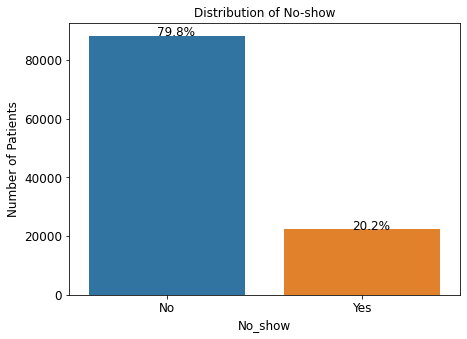

In [76]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

def without_hue(plot, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
    plt.show()
    
plt.figure(figsize = (7,5))
ax = sns.countplot('No_show',data = df)
plt.title('Distribution of No-show')
plt.xticks(size = 12)
plt.xlabel('No_show', size = 12)
plt.yticks(size = 12)
plt.ylabel('Number of Patients', size = 12)
without_hue(ax,df.No_show);

We can see only 20% of patients failed to show up for their appointments, though this is not very bad, but it is significant.

<a id='b'></a>
#### Did Patients enrolled in the scholarship program show up for appointment more than others?
In welfare programs, beneficiaries are expected to receive some incentives which could be subsidy for treatment and medicine, or transport fares etc. this could be and encouragement for them to show up for their appointment.

This question will help understand if this assumption is true.

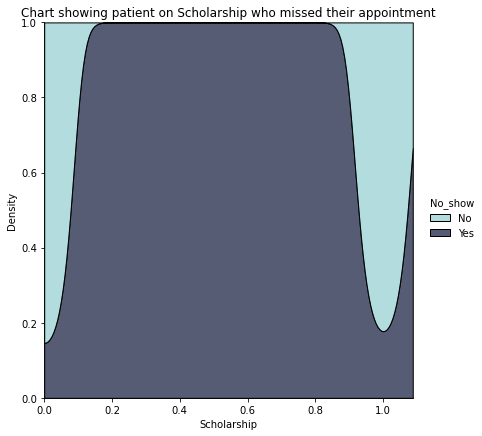

In [41]:
sns.displot(data=df,x="Scholarship", hue="No_show", kind="kde", height=6,multiple="fill", clip=(0, None),
            palette="ch:rot=-.25,hue=1,light=.75");
plt.title("Chart showing patient on Scholarship who missed their appointment");

This shows that most of the patients on scholarship are No-show (i.e. they did not show up for their appointment)

<a id='c'></a>
#### Did younger patients show up for their appointment more than older patients?
This question will help us to understand if younger patients ahow up for their appointments than older patients, since ti will be assumed that they are more enegetic than older patients.

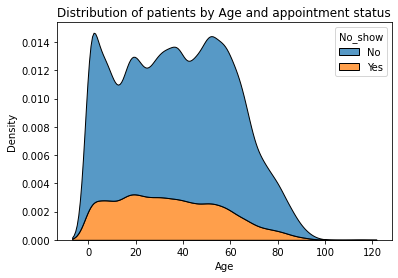

In [45]:
sns.kdeplot(data=df, x="Age", hue="No_show", multiple="stack",legend=True).set(title='Distribution of patients by Age and appointment status');

From the chart above it shows that most patients within the age of 0-100 show up for their appointment, However, looking at the No-show(Yes), we can see that those above 60 year are less likely to miss their appointment.

<a id='d'></a>
#### Which Gender has more Patients?
With this question we will understand which gender visits health facilty more.
Here, we count each patient as either Male(M) or Female(F).

,Gender
Gender,
F,71840
M,38687


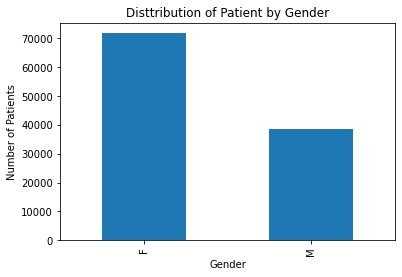

In [75]:
df.groupby(['Gender'])['Gender'].count().plot(kind='bar', title='Disttribution of Patient by Gender').set_ylabel('Number of Patients');
df.groupby(['Gender'])[['Gender']].count()

The Females (F) gender has 7,840 patients. This shows that more Female Patience gets medical appointment than Male patients

<a id='e'></a>
#### Which Age has the higest number of patients?
This question will help us hunderstand the patients by their age categories. 
We are taking the count of each age group of the patients.

3539

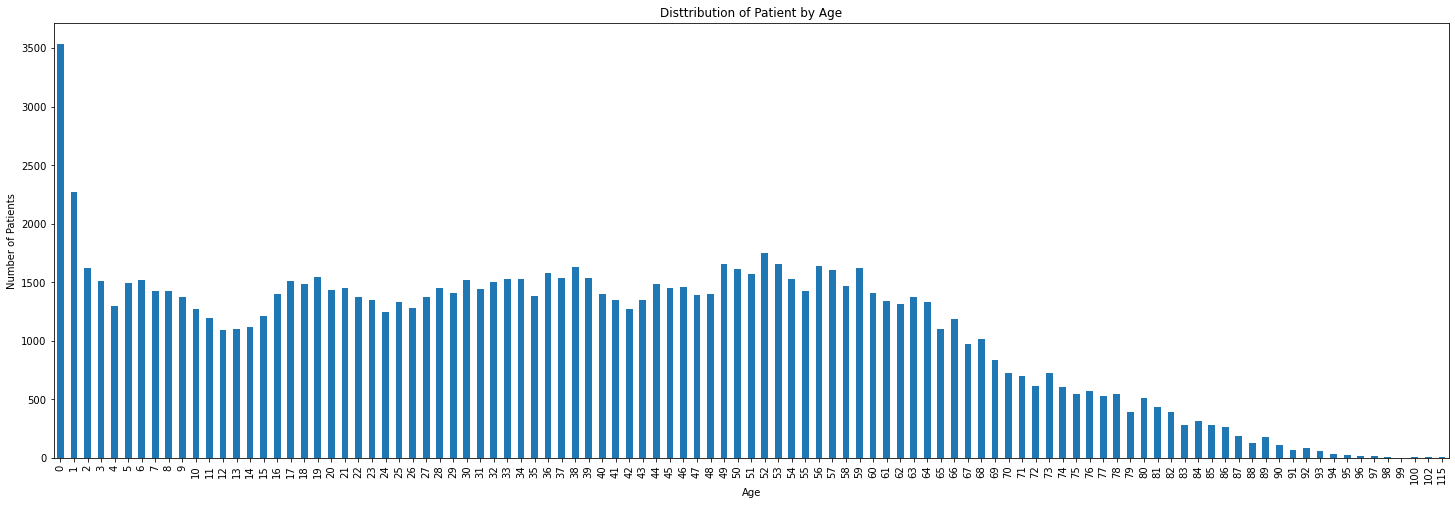

In [115]:
df.groupby(['Age'])['Age'].count().plot(kind='bar',figsize= (25,8), title='Disttribution of Patient by Age').set_ylabel('Number of Patients');
df.groupby(['Age'])['Age'].count().max()

We can see that age group zero(0) has the hightest number (3,539) of patients.
This shows that children of age zero(0) are more in number than any age group.

<a id='f'></a>
#### Which Location has the highest number of Patients Appointments?
We will understand which neighbourhood has the highest number of patients, we will take a count of frequency of each neighbourhood.

Neighbourhood    7717
dtype: int64

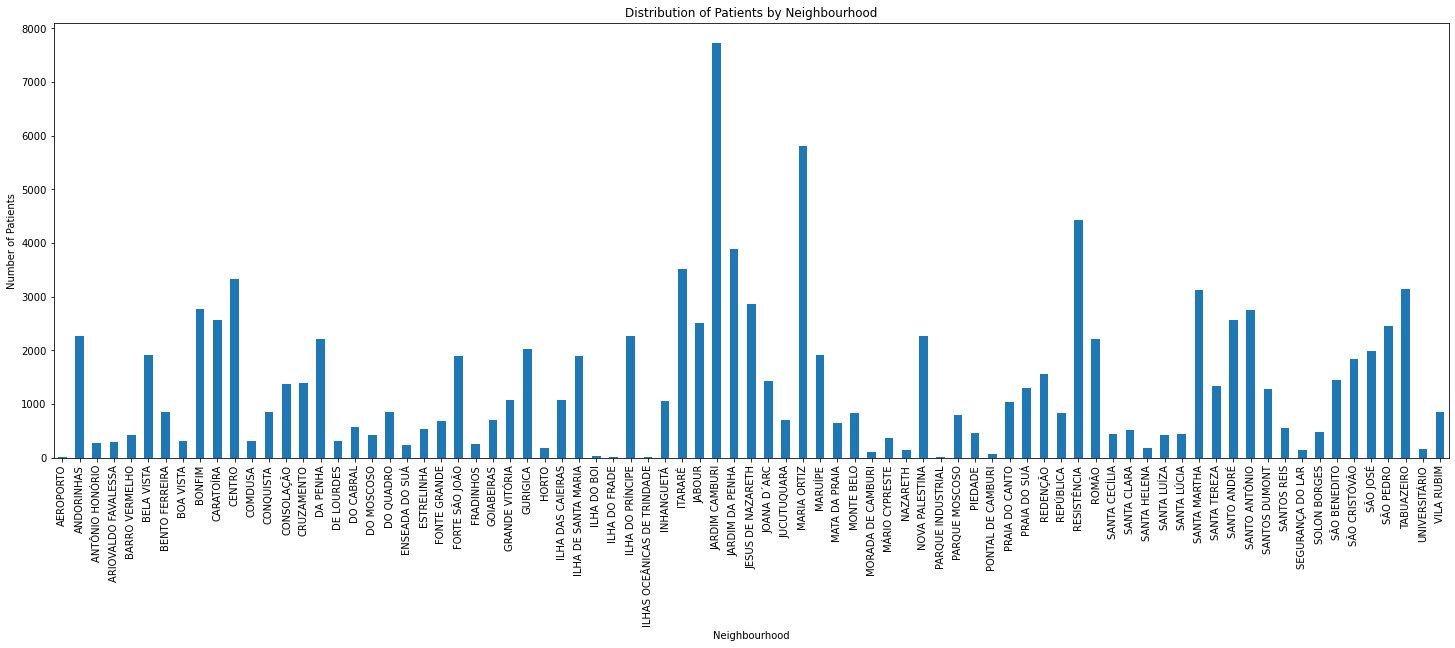

In [118]:
df.groupby(['Neighbourhood'])['Neighbourhood'].count().plot(kind='bar',  figsize= (25,8), title='Distribution of Patients by Neighbourhood').set_ylabel('Number of Patients');
df.groupby(['Neighbourhood'])[['Neighbourhood']].count().max()

Jardim Camburi has the highest number (7,717) of patient appointments.

<a id='g'></a>
#### Which day of the week most Patients set up their appointment?
This question will give us understanding of the day of the week that most patients scheduled their appointment, we will do this by grouping all dates according to day of the week, the count number of schedules for each day.

ScheduledDay
Friday       18915
Monday       23085
Saturday        24
Thursday     18073
Tuesday      26168
Wednesday    24262
Name: ScheduledDay, dtype: int64

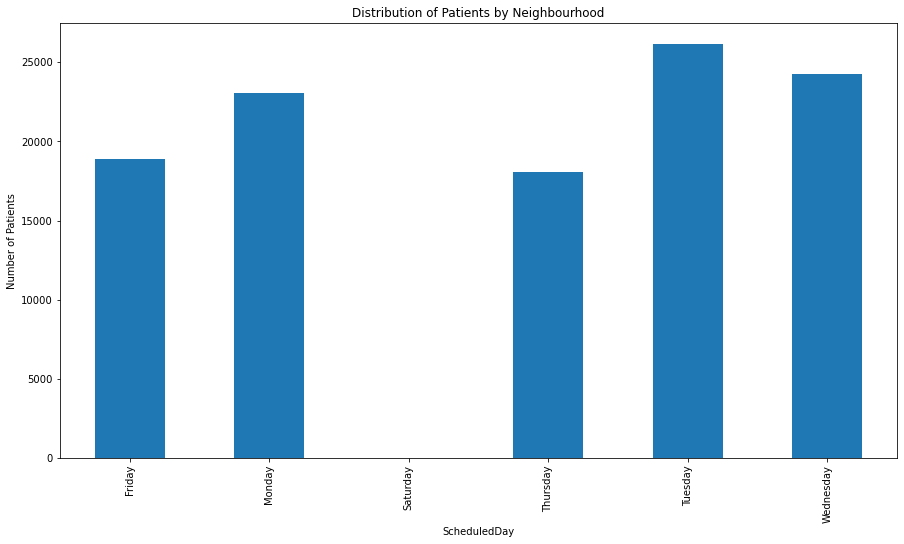

In [109]:
weekdays = df['ScheduledDay'].dt.day_name() #get the week day name of each scheduled date
df.groupby(weekdays)['ScheduledDay'].count().plot(kind='bar',  figsize= (15,8), title='Distribution of Patients by Neighbourhood').set_ylabel('Number of Patients');
df.groupby(weekdays)['ScheduledDay'].count()

from the chart we can see that most patients scheduled their Appointments on Tuesdays, having 26,168 patients makes schedule that day.

<a id='h'></a>
#### Which day of the week is the most busiest?
We will gain understanding of the day of the week has most appointments, we will achieve this by counting all appointment for each of the day of the week.

AppointmentDay
Friday       19019
Monday       22715
Saturday        39
Thursday     17247
Tuesday      25640
Wednesday    25867
Name: AppointmentDay, dtype: int64

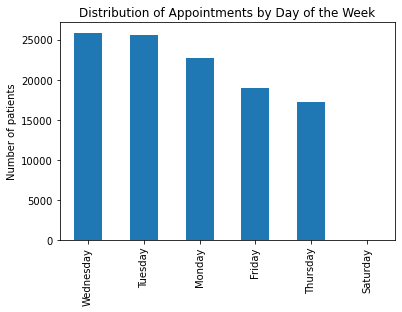

In [119]:
weekdaysa = df['AppointmentDay'].dt.day_name()
weekdaysa.value_counts().plot(kind='bar', title='Distribution of Appointments by Day of the Week').set_ylabel('Number of patients');
df.groupby(weekdaysa)['AppointmentDay'].count()

While Saturday's has the lowest number (39) of appointments, we can see that most patients got their appointment fixed on Wednesdays having 25,867 appointments.

<a id='conclusions'></a>
## Conclusions

Generally, most of the patient are Females, and we can also see that most patients (80%) attended their Medical appointment.

Looking at the patients on scholarship to see if they show up for their appointment more, but it turned out that those on scholarship miss their appointments the most.

Finally, patieints above age 60 seems to show up for their appointment more.

<a id='limitation'></a>
## Limitations
Because no statistical test was done, this report is could not state the cause as to why those on scholarship miss their appointments despite welfare they enjoy, and also could not establish if age is a determining factor as to whether a patient show up for appointment or Not.

<a id='reference'></a>
## References
<ul>
<li>https://stackoverflow.com/questions/35692781/python-plotting-percentage-in-seaborn-bar-plot</li>
    <li>https://seaborn.pydata.org/</li>
</ul>